![](aerofit_1.png)


# Business Case: Aerofit - Descriptive Statistics & Probability


---------------------------------------------------------------------------------------------------------------------------

**About Aerofit -**

    Aerofit is a leading brand in the field of fitness equipment. 
    
    Aerofit provides a product range including machines such as 
    
    treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.
    
    

---------------------------------------------------------------------------------------------------------------------------

**Business Problem -**

    The market research team at AeroFit wants to identify the characteristics of the target audience 
    
    for each type of treadmill offered by the company, to provide a better recommendation of the treadmills 
    
    to the new customers.
    
    

---------------------------------------------------------------------------------------------------------------------------

_**Importing Python Libraries necessary while carrying out data exploration & visualisation**_ -
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm, binom, geom


---------------------------------------------------------------------------------------------------------------------------

_**Upload & read csv file in pandas dataframe**_ -
    

In [170]:
aerofit = pd.read_csv("aerofit.txt", sep = ",")


---------------------------------------------------------------------------------------------------------------------------

_**Inspecting Dataset & Analyzing Different Matrics**_ -
    

In [4]:
aerofit.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
aerofit.tail()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


---------------------------------------------------------------------------------------------------------------------------

_**Observations on**_ -
    
        1) shape of data
        
        2) data types
        
        3) Statistical summary
        

In [17]:
aerofit.shape


(180, 9)

In [18]:
aerofit.columns


Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [19]:
aerofit.size


1620

In [20]:
aerofit.dtypes


Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [21]:
aerofit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [22]:
aerofit.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [23]:
aerofit.describe(include = object)


,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


---------------------------------------------------------------------------------------------------------------------------

**Comparison Between mean & median -**

In [75]:
aerofit.mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_12692\2255133280.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  aerofit.mean()


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [76]:
aerofit.median()


C:\Users\hp\AppData\Local\Temp\ipykernel_12692\3054290397.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  aerofit.median()


Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

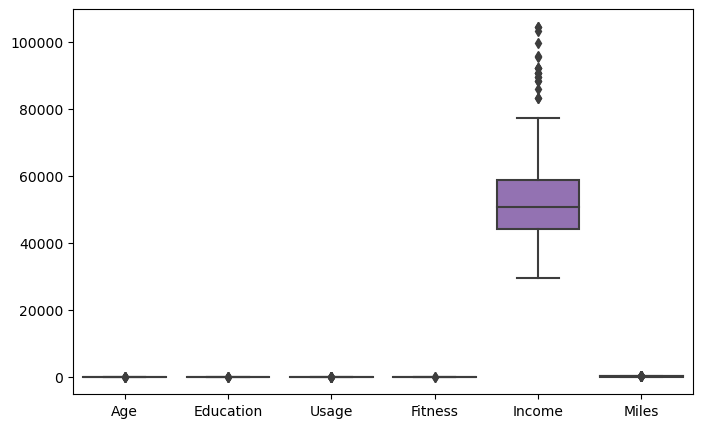

In [81]:
plt.figure(figsize = (8, 5))
sns.boxplot(aerofit)
plt.show()


---------------------------------------------------------------------------------------------------------------------------

**Data Cleaning -** 
    
        Check for Missing values & Duplicates.
        

In [24]:
aerofit.isnull().sum().sort_values(ascending = False)


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [25]:
aerofit[aerofit.duplicated()]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


---------------------------------------------------------------------------------------------------------------------------

**Comment -**

    No null values & duplicate values present in dataset
    

---------------------------------------------------------------------------------------------------------------------------

**Non Graphical Analysis -**

In [27]:
# product wise unique value & count -
aerofit["Product"].unique()


array(['KP281', 'KP481', 'KP781'], dtype=object)

In [7]:
aerofit["Product"].value_counts(normalize = True).round(2) * 100


KP281    44.0
KP481    33.0
KP781    22.0
Name: Product, dtype: float64

**Comments -**

    1) we have three types of products namely KP281, KP481, KP781.
    
    2) The % percentage of buying of products are shown below.
    
        KP281 = 44%  ---> The most
        
        KP481 = 33%  ---> The intermediate
        
        KP781 = 22%  ---> The lowest
        

---------------------------------------------------------------------------------------------------------------------------

In [30]:
# Age wise unique value & count -
aerofit["Age"].unique()


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [10]:
aerofit["Age"].value_counts()


25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

**Comments -**

    1) we have customers from age range of 18-42.
    
    2) Most of the customers lies in the range of 25-30.
    

---------------------------------------------------------------------------------------------------------------------------

In [32]:
# Gender wise unique value & count -
aerofit["Gender"].unique()


array(['Male', 'Female'], dtype=object)

In [11]:
aerofit["Gender"].value_counts(normalize = True).round(2) * 100


Male      58.0
Female    42.0
Name: Gender, dtype: float64

**Comments -**

    1) we have male customers more than female.
    

---------------------------------------------------------------------------------------------------------------------------

In [34]:
# Education wise unique value & count -
aerofit["Education"].unique()


array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [35]:
aerofit["Education"].value_counts()


16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

**Comments -**

    1) The count of education is more for 16-18 range.
    

---------------------------------------------------------------------------------------------------------------------------

In [36]:
# Marital status wise unique value & count -
aerofit["MaritalStatus"].unique()


array(['Single', 'Partnered'], dtype=object)

In [12]:
aerofit["MaritalStatus"].value_counts(normalize = True).round(2) * 100


Partnered    59.0
Single       41.0
Name: MaritalStatus, dtype: float64

**Comments -**

    1) Partnered people are tend to be more in numbers as compared to single person .
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

In [38]:
# Usage wise unique value & count -
aerofit["Usage"].unique()


array([3, 2, 4, 5, 6, 7], dtype=int64)

In [13]:
aerofit["Usage"].value_counts(normalize = True).round(2) * 100


3    38.0
4    29.0
2    18.0
5     9.0
6     4.0
7     1.0
Name: Usage, dtype: float64

**Comments -**

    1) People with avg work out for 3 days, 4 days & 2 days are more in number as compared to the other one.
    
    2) There are very less percentage of people who do workout for more than 5 days.
    

---------------------------------------------------------------------------------------------------------------------------

In [40]:
# Fitness wise unique value & count -
aerofit["Fitness"].unique()


array([4, 3, 2, 1, 5], dtype=int64)

In [14]:
aerofit["Fitness"].value_counts(normalize = True).round(2) * 100


3    54.0
5    17.0
2    14.0
4    13.0
1     1.0
Name: Fitness, dtype: float64

**Comments -**

    1) As fitness value indicates the fitness of person.
    
    2) from the above results it shows that there are good amount of people who had maintained their fitness.
    
    3) The count of people who are having poor fitness are low in numbers.
    

---------------------------------------------------------------------------------------------------------------------------

In [42]:
# Income wise unique value & count -
aerofit["Income"].unique()


array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [16]:
aerofit["Income"].value_counts()


45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

**Comments -**

    1) Customers having income between 30k-60k are more in numbers.
    
    2) Customers with income greater than 70k are less as compared to avg income of 53k.
    

---------------------------------------------------------------------------------------------------------------------------

In [45]:
# Miles wise unique value & count -
aerofit["Miles"].unique()


array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [17]:
aerofit["Miles"].value_counts(normalize = True).round(2) * 100


85     15.0
95      7.0
66      6.0
75      6.0
47      5.0
106     5.0
94      4.0
113     4.0
53      4.0
100     4.0
180     3.0
200     3.0
56      3.0
64      3.0
127     3.0
160     3.0
42      2.0
150     2.0
38      2.0
74      2.0
170     2.0
120     2.0
103     2.0
132     1.0
141     1.0
280     1.0
260     1.0
300     1.0
240     1.0
112     1.0
212     1.0
80      1.0
140     1.0
21      1.0
169     1.0
188     1.0
360     1.0
Name: Miles, dtype: float64

**Comments -**

    1) Customers who runs 85 miles per week are 15%.
    
    2) Customers who runs above 200 miles per week are very low in percentage.
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Visual Analysis -**

In [49]:
aerofit.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


---------------------------------------------------------------------------------------------------------------------------

**A. Univariate Analysis -**

**1. Count Plots -**

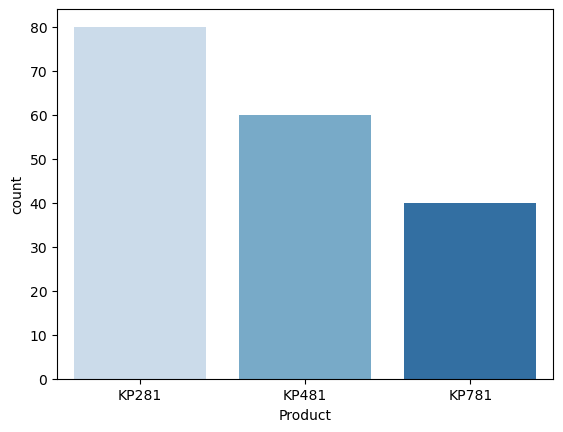

In [102]:
# Product countplot
sns.countplot(x = "Product", data = aerofit, palette = "Blues")
plt.show()


**Comment -**

    From above graph, popularity of KP281 among all is higher
    

---------------------------------------------------------------------------------------------------------------------------

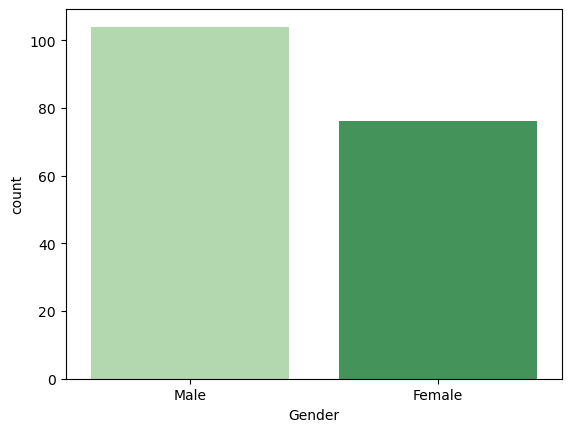

In [109]:
sns.countplot(x = "Gender", data = aerofit, palette = "Greens")
plt.show()


**Comment -**

    From above graph, male are more health conscious.
    

---------------------------------------------------------------------------------------------------------------------------

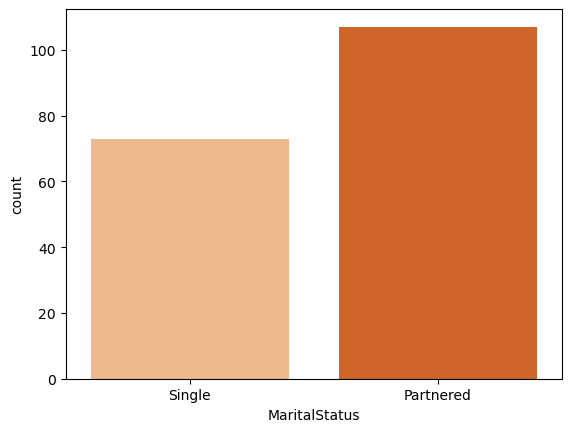

In [113]:
sns.countplot(x = "MaritalStatus", data = aerofit, palette = "Oranges")
plt.show()


**Comment -**

    From above graph, Partner people are more in count than single.

---------------------------------------------------------------------------------------------------------------------------

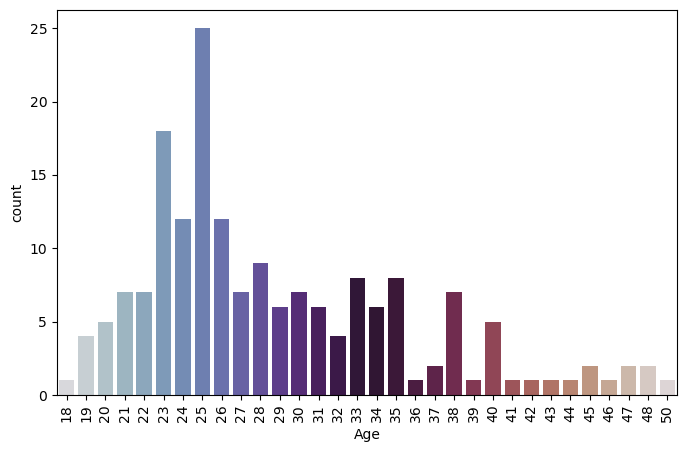

In [118]:
plt.figure(figsize = (8,5))
sns.countplot(x = "Age", data = aerofit, palette = "twilight")
plt.xticks(rotation = 90)
plt.show()


**Comment -**

    From above graph, people in age group of 23-28 are more in numbers than rest of the age group.
    

---------------------------------------------------------------------------------------------------------------------------

**2. Histogram Plots -**

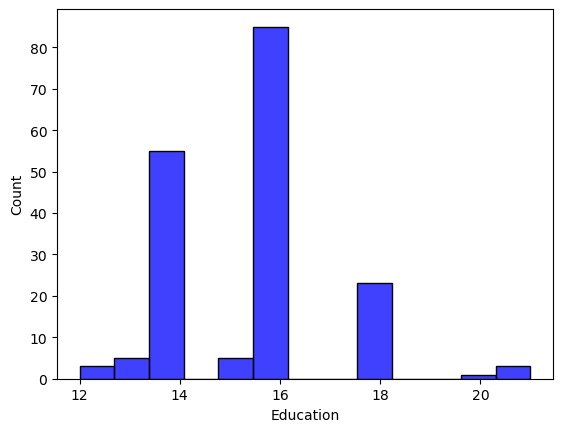

In [124]:
sns.histplot(aerofit["Education"], color = "b")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

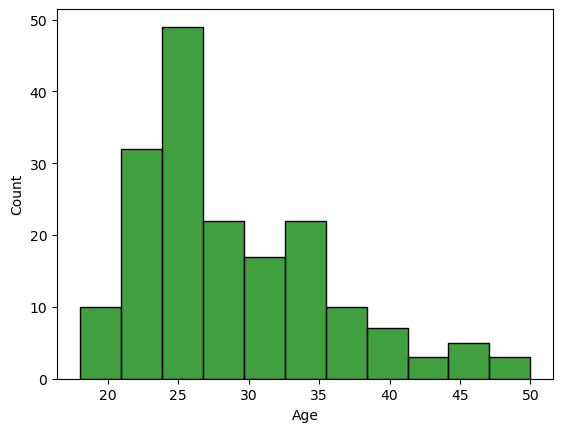

In [127]:
sns.histplot(aerofit["Age"], color = "g")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

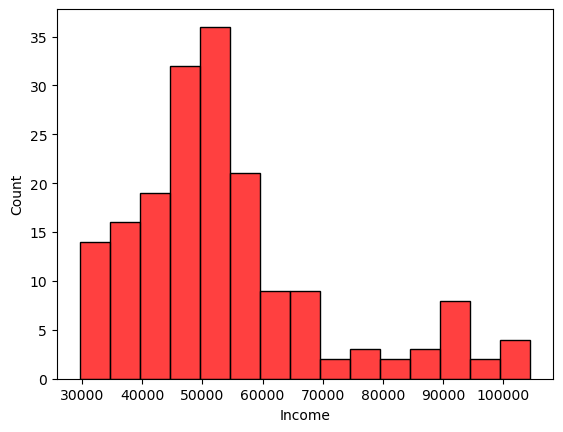

In [129]:
sns.histplot(aerofit["Income"], color = "r")
plt.show()


**Comment -**

    From above graph, people in income group 40k-60k are buying products more in numbers
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**3. Box Plots -**

    To detect whether outliers present or not 
    

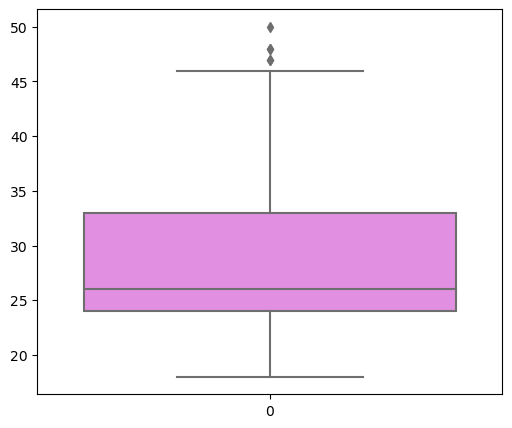

In [146]:
plt.figure(figsize = (6,5))
sns.boxplot(data = aerofit["Age"], orient = "v", color = "violet")
plt.show()



**Comment -**

    Outliers are present (i.e age above 45)
    

---------------------------------------------------------------------------------------------------------------------------

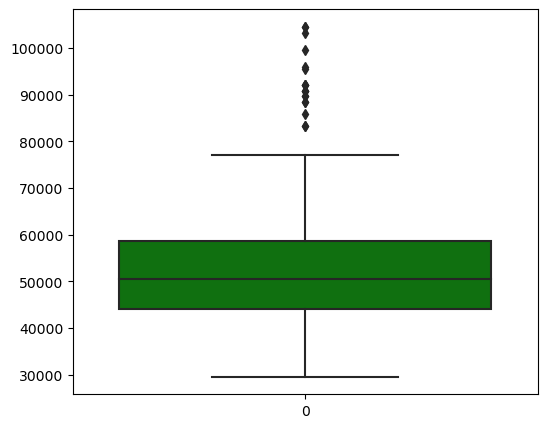

In [147]:
plt.figure(figsize = (6,5))
sns.boxplot(data = aerofit["Income"], color = "green")
plt.show()


**Comment -**

    Outliers are present (i.e income above 80k)
    

---------------------------------------------------------------------------------------------------------------------------

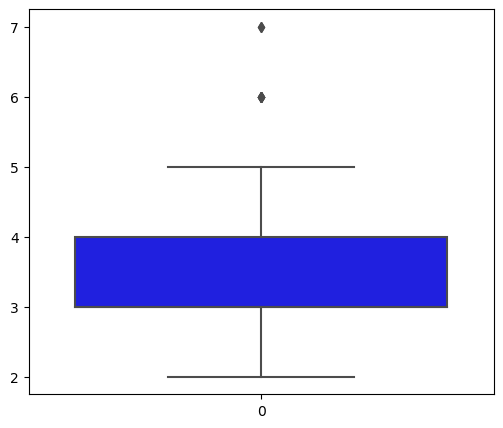

In [149]:
plt.figure(figsize = (6,5))
sns.boxplot(data = aerofit["Usage"], color = "blue")
plt.show()


**Comment -**

    Outliers are present (i.e usage above 5 days per week)
    

---------------------------------------------------------------------------------------------------------------------------

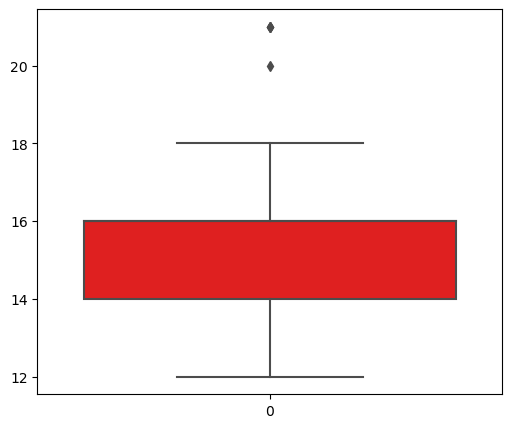

In [151]:
plt.figure(figsize = (6,5))
sns.boxplot(data = aerofit["Education"], color = "red")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

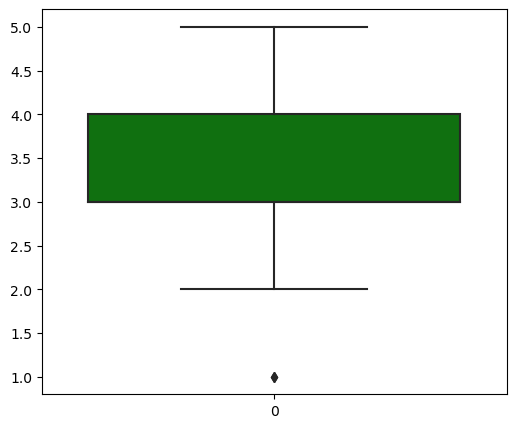

In [155]:
plt.figure(figsize = (6,5))
sns.boxplot(data = aerofit["Fitness"], color = "green")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

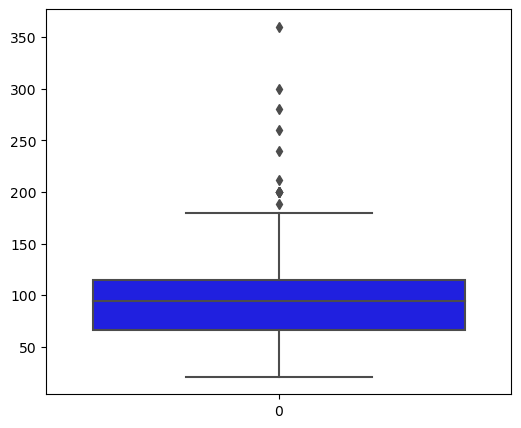

In [157]:
plt.figure(figsize = (6,5))
sns.boxplot(data = aerofit["Miles"], color = "blue")
plt.show()


**Comment -**

    Outliers are present (i.e. miles above 200)
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**B. Bivariate Analysis -**

**1. Histogram Plots -**

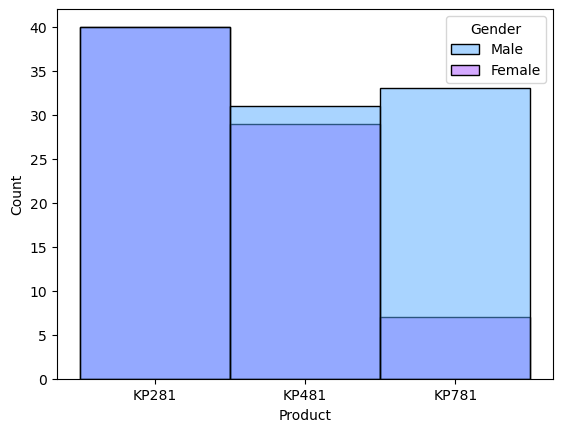

In [170]:
# Product vs Gender -
sns.histplot(x = "Product", hue = "Gender", data = aerofit, palette = "cool")
plt.show()


**Comment -**


    **KP281 -
    
        1) Buying percentage of female is maximum.
        

    **KP481 -
    
        1) Buying percentage of female is more as compared to male.
        
        
    **KP781 -
    
        1) Buying percentage of male is more as compared to female.
    
    

---------------------------------------------------------------------------------------------------------------------------

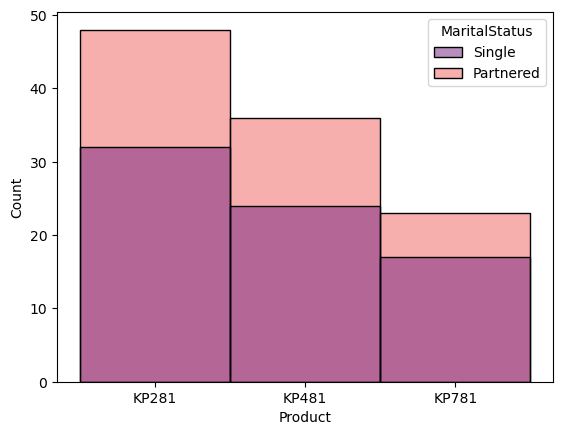

In [173]:
# Product vs Marital Status-
sns.histplot(x = "Product", hue = "MaritalStatus", data = aerofit, palette = "magma")
plt.show()


**Comment -**


    **KP281 -
    
        1) Buying percentage of male is more than female.
        

    **KP481 -
    
        1) Buying percentage of male is more than female.
        
        
    **KP781 -
    
        1) Buying percentage of male is more than female.
    

---------------------------------------------------------------------------------------------------------------------------

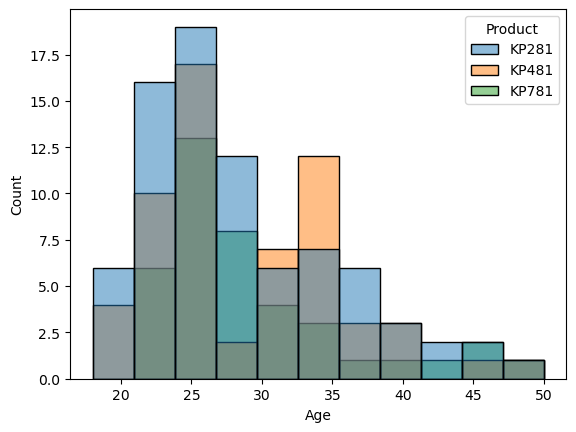

In [182]:
# Product vs Age -
sns.histplot(x = "Age", hue = "Product", data = aerofit)
plt.show()


**Comment -**


    **KP281 -
    
        1) It is widely popular among different age groups.
        

    **KP481 -
    
        1) It is less popular as compared to KP281.
        
        
    **KP781 -
    
        1) It is somehow popular in the age group of having good income.
    

---------------------------------------------------------------------------------------------------------------------------

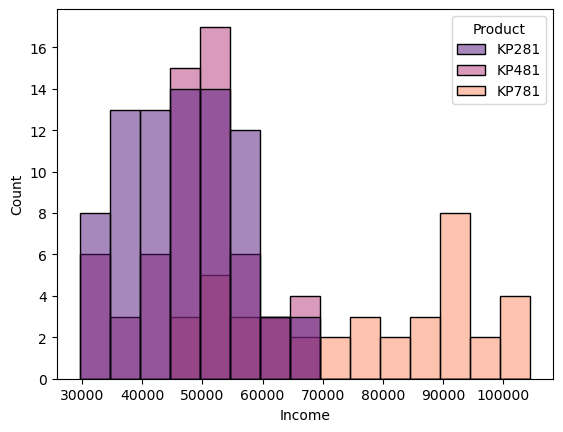

In [187]:
# Product vs Income -
sns.histplot(x = "Income", hue = "Product", data = aerofit, palette = "magma")
plt.show()


**Comment -**


    **KP281 -
    
        1) As the product available in lower price hence they are purchased more by income group (30k-60k)
        

    **KP481 -
    
        1) This product is also consider by people having income in range of 30k-nearly 70k.
        
        
    **KP781 -
    
        1) People with high income prefer this product (i.e 70k-100k).
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**2. Count Plots -**

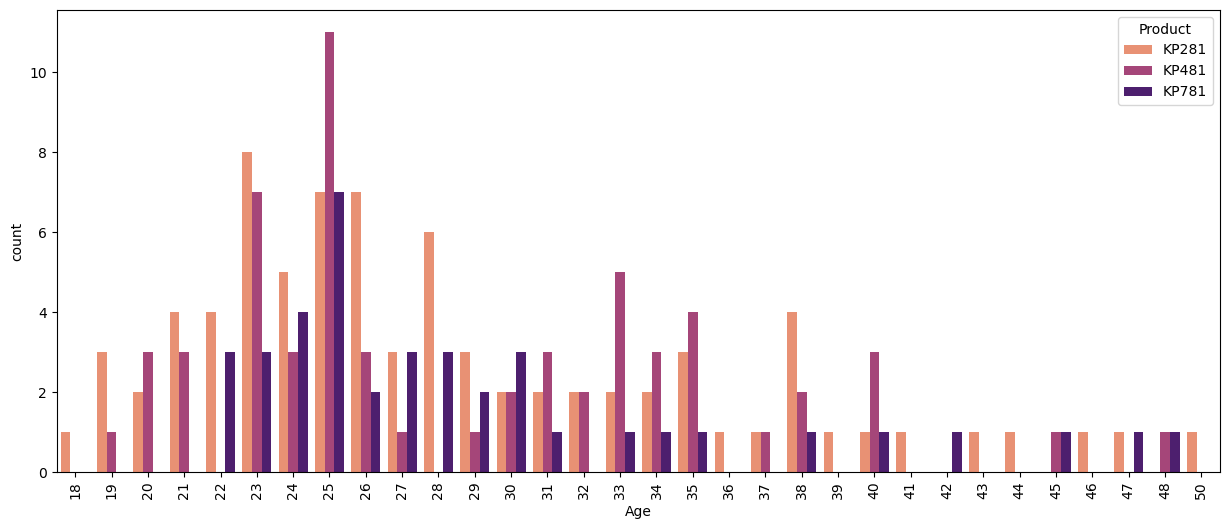

In [202]:
plt.figure(figsize = (15,6))
sns.countplot(x = "Age", hue = "Product", data = aerofit, palette = "magma_r" )
plt.xticks( rotation = 90)
plt.show()


**Comment -**


    **KP281 -
    
        1) People with nearly every age uses this products.
        

    **KP481 -
    
        1) People having age between 19-48 uses this product.
        
        2) People with most number are present in the age group of 23-26.
        
        
    **KP781 -
    
        1) As the product is expensive, it is used by people having age in between 23-30.
        
        2) The number of count decreases for the people having age greater than 30.
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**C. Multivariate Analysis -**

    To check correlation

**1. Pair plots -**

<Figure size 1200x1000 with 0 Axes>

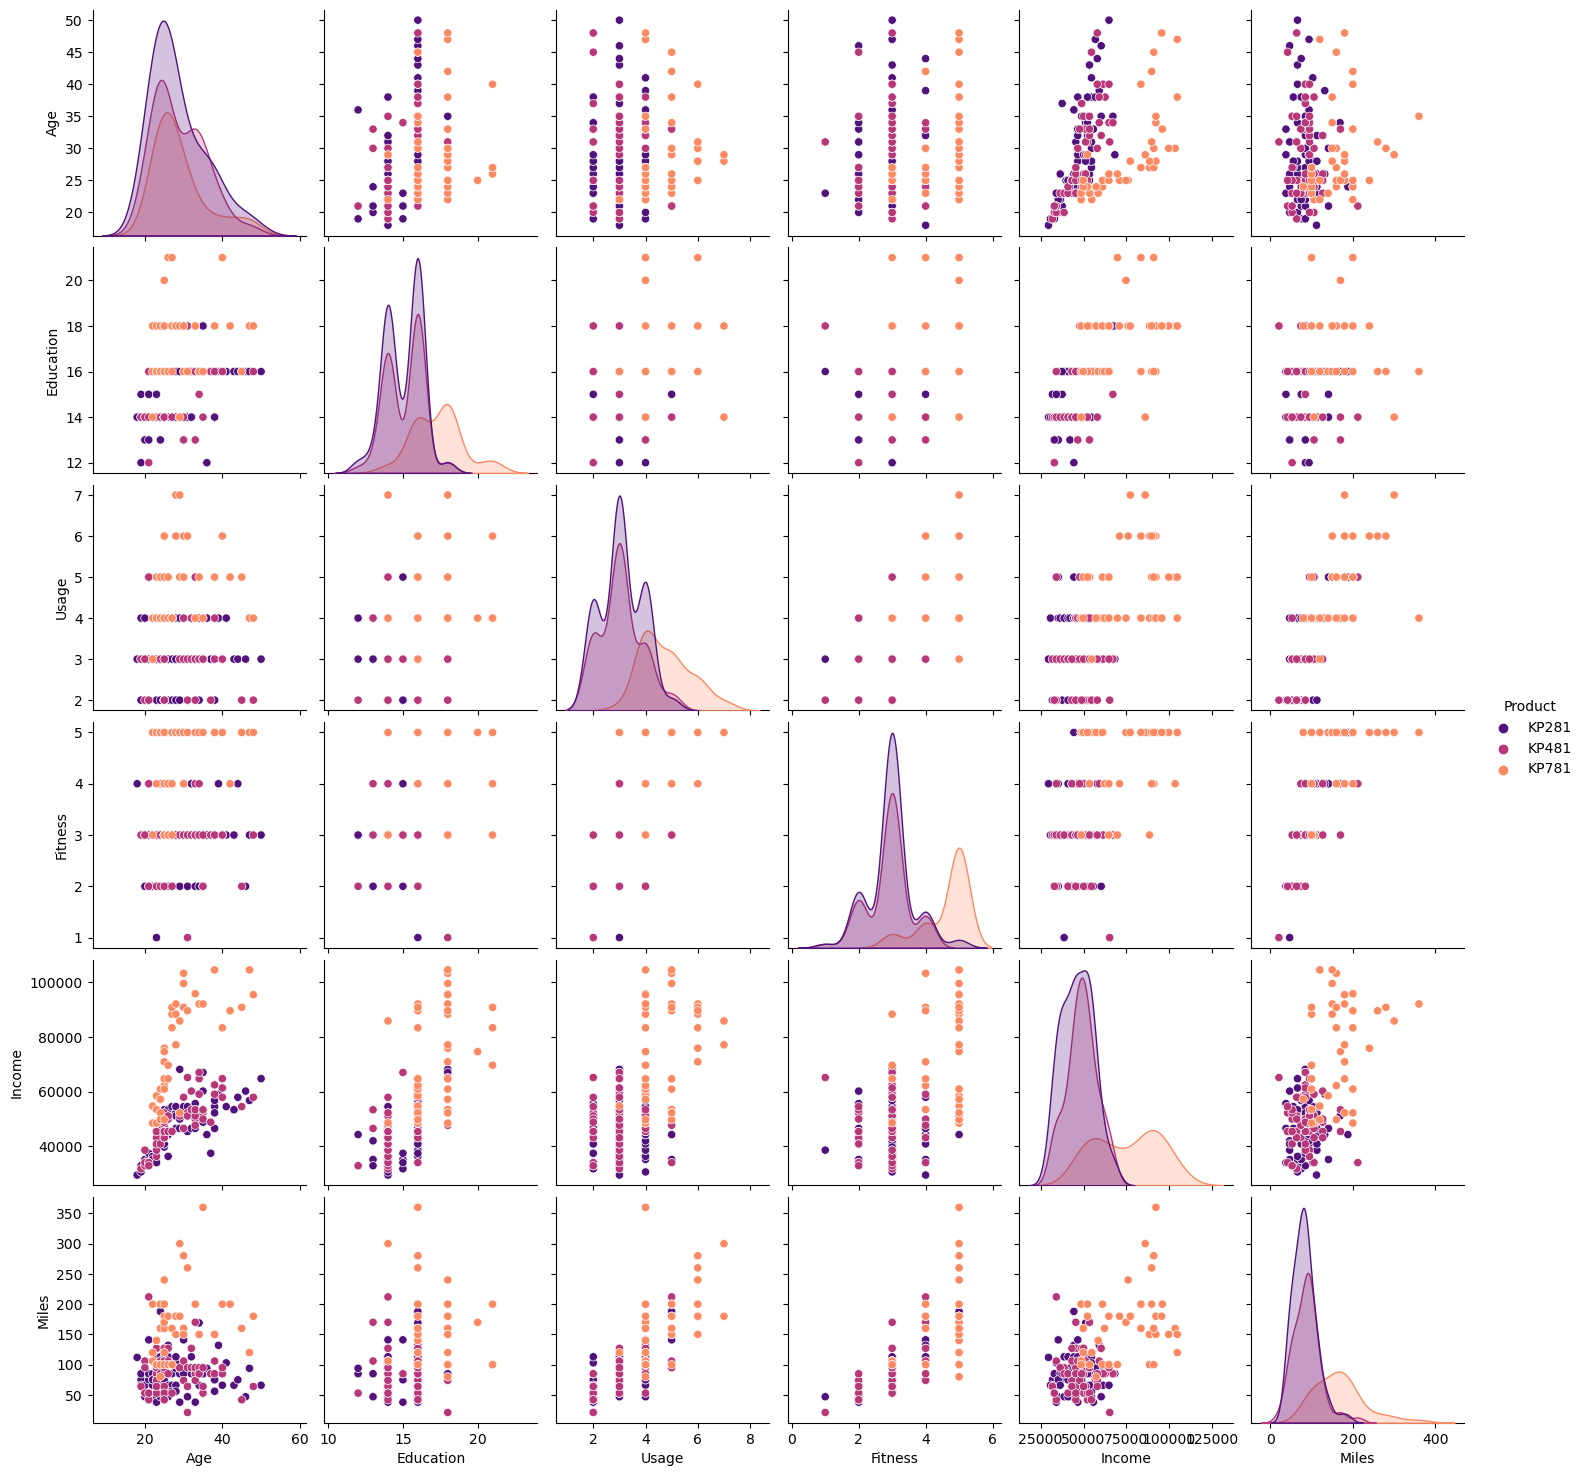

In [5]:
# Product analysis
plt.figure(figsize = (12, 10))
sns.pairplot(aerofit, hue = "Product", palette = "magma")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

<Figure size 1200x1000 with 0 Axes>

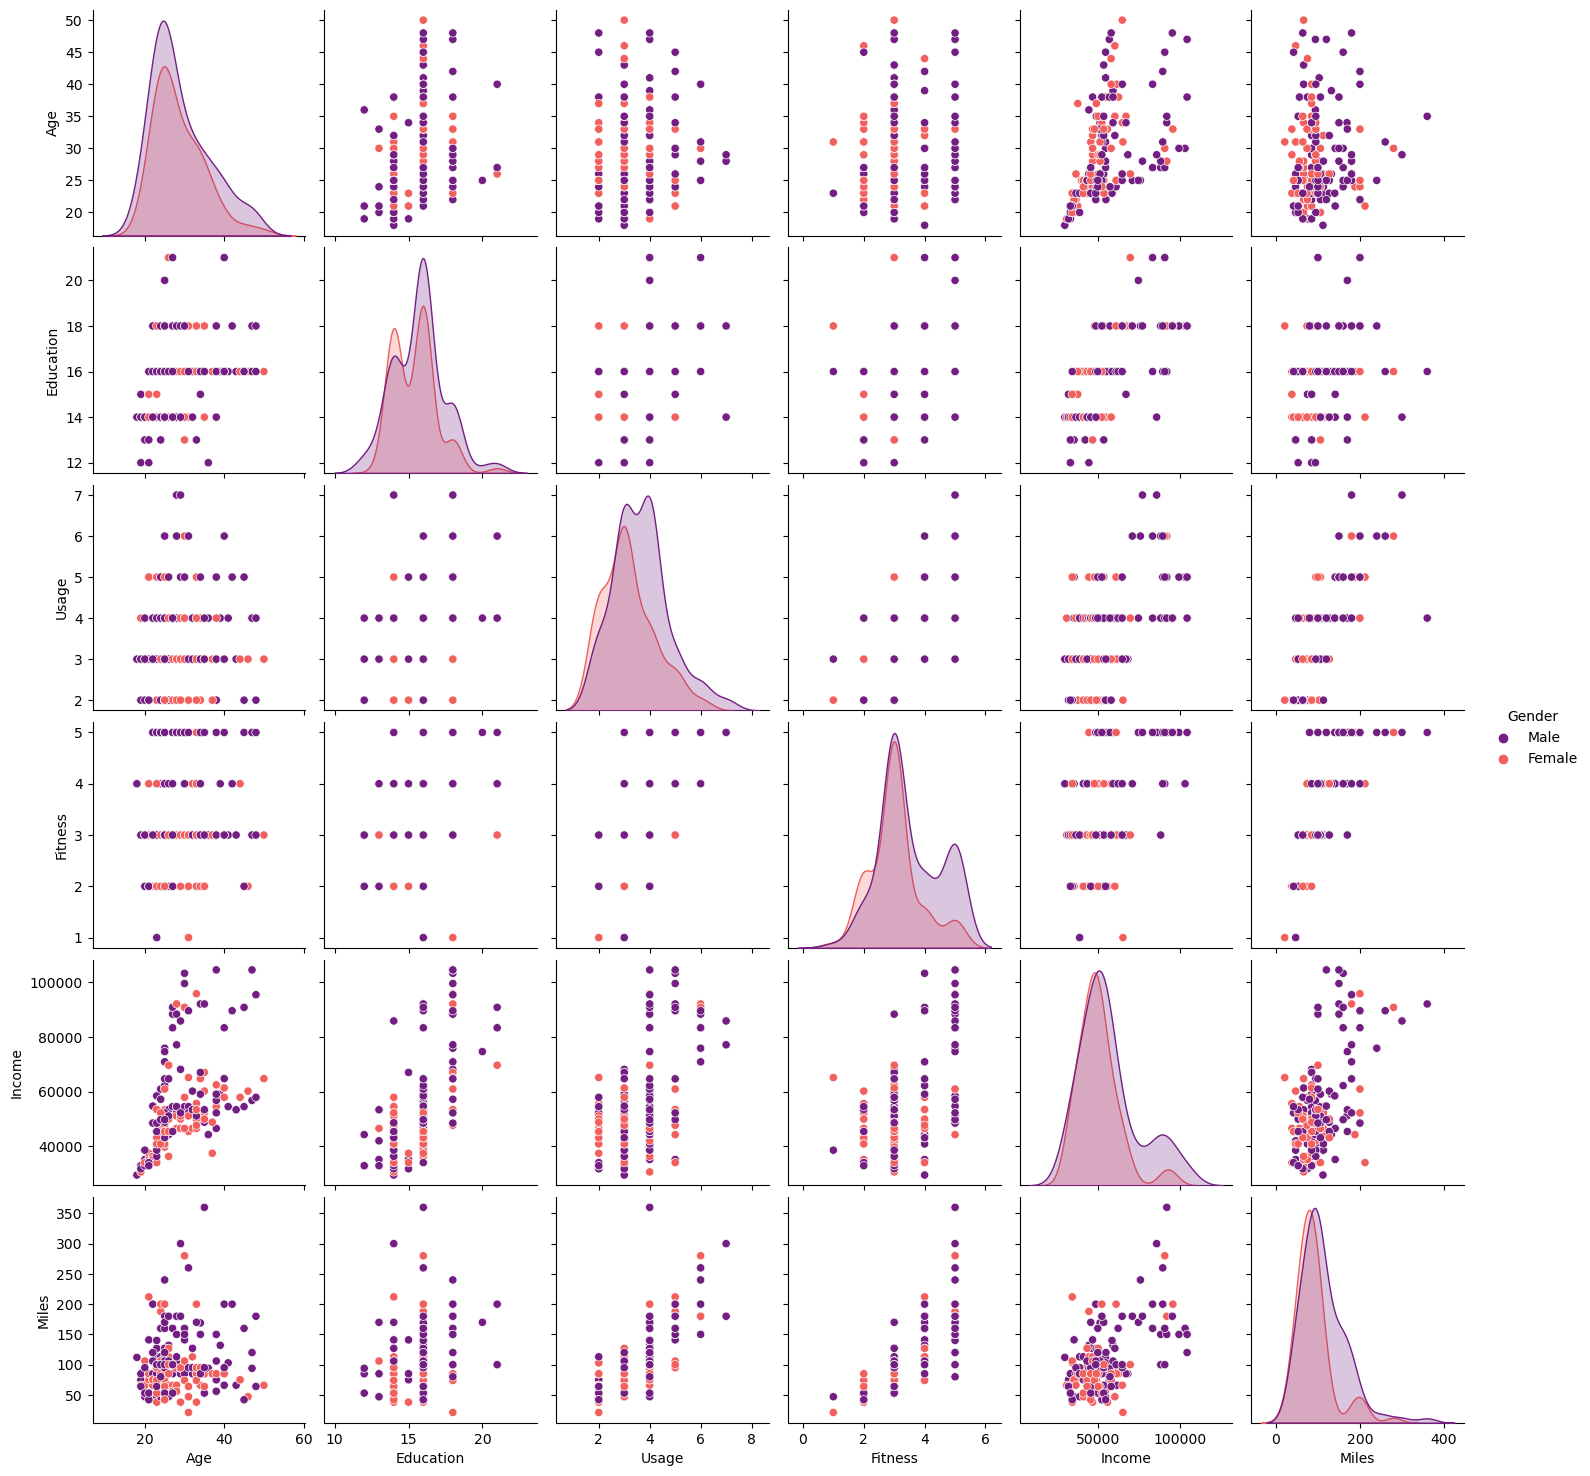

In [6]:
# Gender analysis
plt.figure(figsize = (12, 10))
sns.pairplot(aerofit, hue = "Gender", palette = "magma")
plt.show()


---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**2. Correlation -**

C:\Users\hp\AppData\Local\Temp\ipykernel_11016\3033231350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit.corr(), annot = True, cmap = "Oranges")


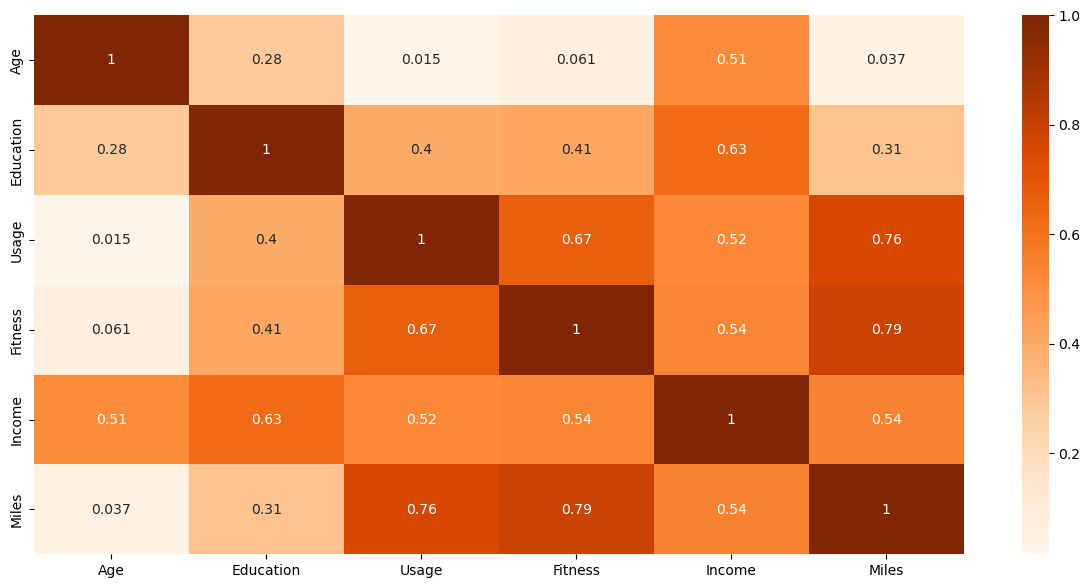

In [22]:
plt.figure(figsize = (15, 7))
sns.heatmap(aerofit.corr(), annot = True, cmap = "Oranges")
plt.show()


**Comment -**


    1) Usage, Fitness are strongly correlated to miles (correlation factor is 0.76 & 0.79 respectively).
    
    2) Education and income are strongly correlated to each other (correlation factor is 0.63).
    
    3) Age & fitness is weakly correlated (correlation factor is 0.015).
    

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**Visualization using Box Plots-**

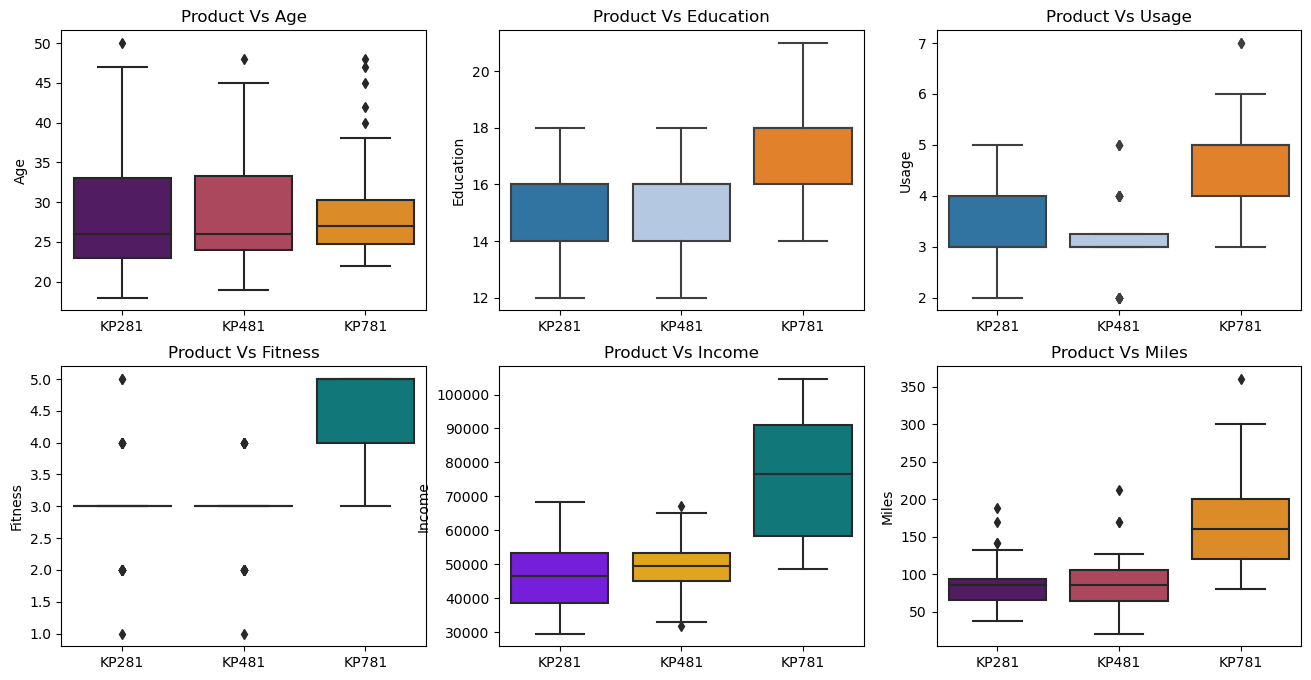

In [193]:
# Product vs Various Factors (Age, Education, Usage, Fitness, Income, Miles)

plt.figure(figsize = (16, 8))
fig.subplots_adjust(top = 1.4, bottom = 1.3)

plt.subplot(2, 3, 1)
sns.boxplot(data = aerofit, x = "Product", y = "Age", palette = "inferno")
plt.title("Product Vs Age", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 2)
sns.boxplot(data = aerofit, x = "Product", y = "Education", palette = "tab20")
plt.title("Product Vs Education", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 3)
sns.boxplot(data = aerofit, x = "Product", y = "Usage", palette = "tab20")
plt.title("Product Vs Usage", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 4)
sns.boxplot(data = aerofit, x = "Product", y = "Fitness", palette = "prism_r")
plt.title("Product Vs Fitness", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 5)
sns.boxplot(data = aerofit, x = "Product", y = "Income", palette = "prism_r")
plt.title("Product Vs Income", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 6)
sns.boxplot(data = aerofit, x = "Product", y = "Miles", palette = "inferno")
plt.title("Product Vs Miles", fontsize = 12)
plt.xlabel("")

plt.show()


---------------------------------------------------------------------------------------------------------------------------

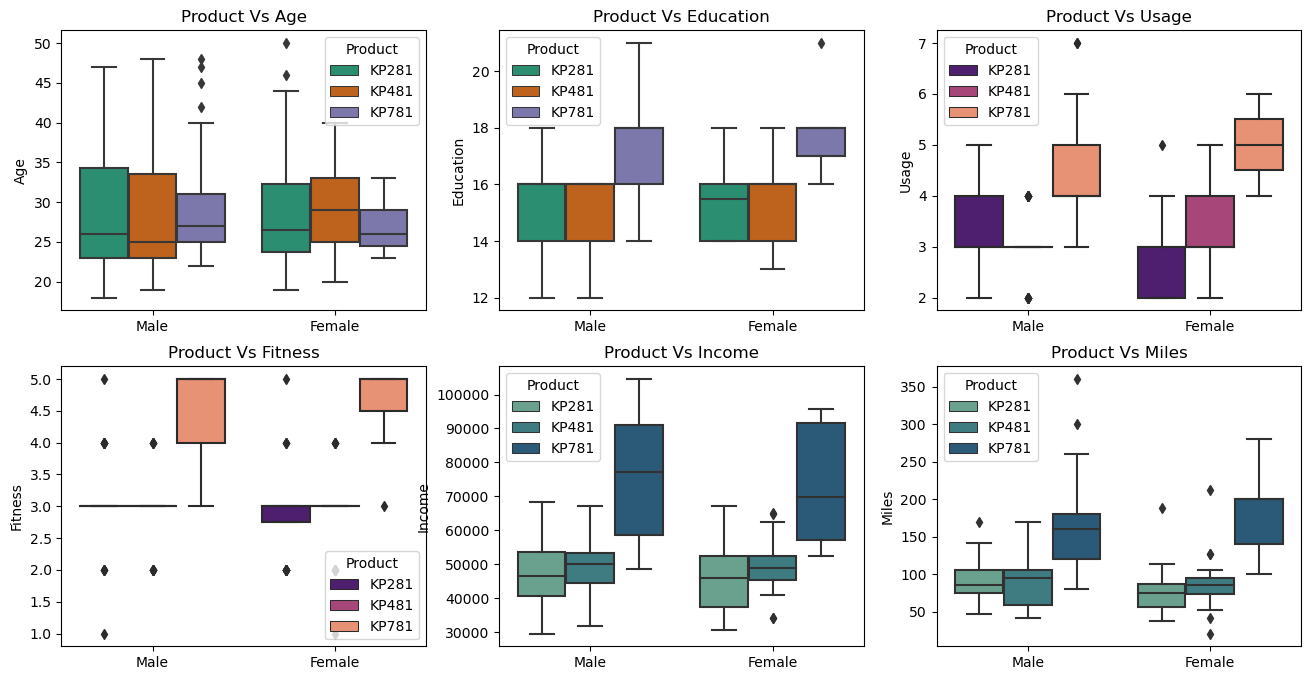

In [195]:
# Gender vs Variuos factor (Age, Education, Usage, Fitness, Income, Miles)

plt.figure(figsize = (16, 8))
fig.subplots_adjust(top = 1.4, bottom = 1.3)

plt.subplot(2, 3, 1)
sns.boxplot(data = aerofit, x = "Gender", y = "Age", hue = "Product", palette = "Dark2")
plt.title("Product Vs Age", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 2)
sns.boxplot(data = aerofit, x = "Gender", y = "Education", hue = "Product", palette = "Dark2")
plt.title("Product Vs Education", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 3)
sns.boxplot(data = aerofit, x = "Gender", y = "Usage", hue = "Product", palette = "magma")
plt.title("Product Vs Usage", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 4)
sns.boxplot(data = aerofit, x = "Gender", y = "Fitness", hue = "Product", palette = "magma")
plt.title("Product Vs Fitness", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 5)
sns.boxplot(data = aerofit, x = "Gender", y = "Income", hue = "Product", palette = "crest")
plt.title("Product Vs Income", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 6)
sns.boxplot(data = aerofit, x = "Gender", y = "Miles", hue = "Product", palette = "crest")
plt.title("Product Vs Miles", fontsize = 12)
plt.xlabel("")

plt.show()


---------------------------------------------------------------------------------------------------------------------------

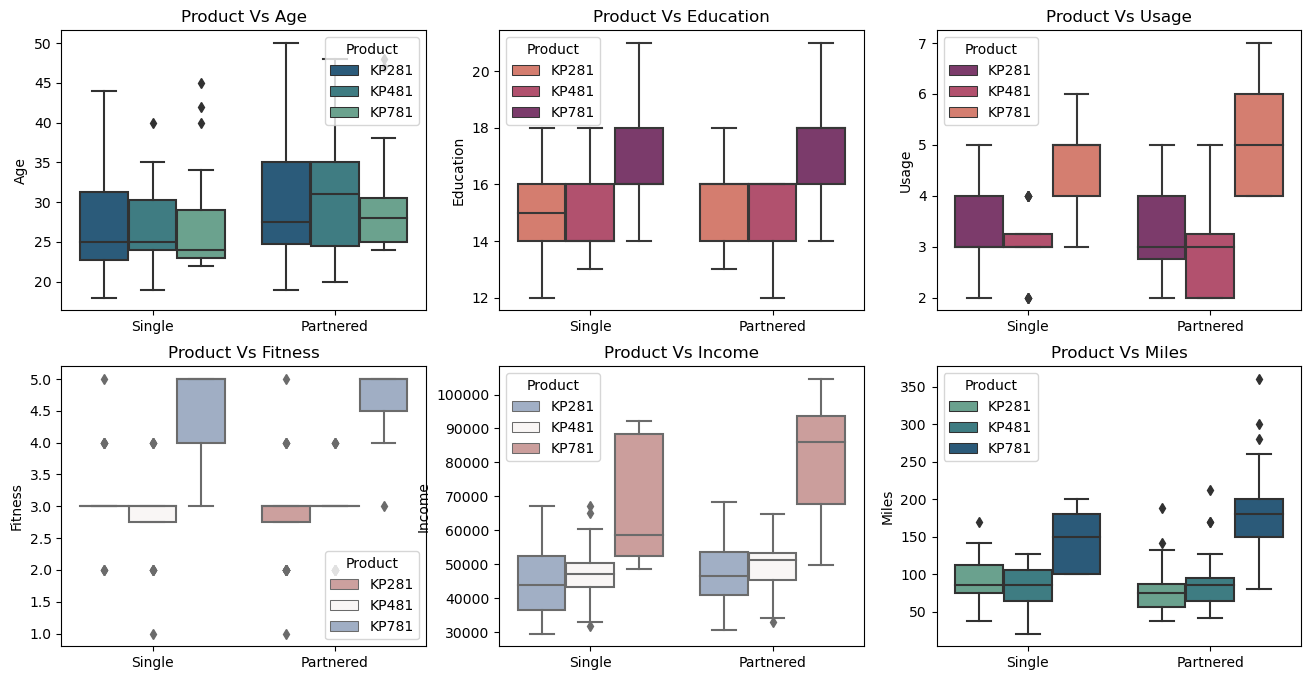

In [197]:
# Marital Status vs Variuos factor (Age, Education, Usage, Fitness, Income, Miles)

plt.figure(figsize = (16, 8))
fig.subplots_adjust(top = 1.4, bottom = 1.3)

plt.subplot(2, 3, 1)
sns.boxplot(data = aerofit, x = "MaritalStatus", y = "Age", hue = "Product", palette = "crest_r")
plt.title("Product Vs Age", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 2)
sns.boxplot(data = aerofit, x = "MaritalStatus", y = "Education", hue = "Product", palette = "flare")
plt.title("Product Vs Education", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 3)
sns.boxplot(data = aerofit, x = "MaritalStatus", y = "Usage", hue = "Product", palette = "flare_r")
plt.title("Product Vs Usage", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 4)
sns.boxplot(data = aerofit, x = "MaritalStatus", y = "Fitness", hue = "Product", palette = "vlag_r")
plt.title("Product Vs Fitness", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 5)
sns.boxplot(data = aerofit, x = "MaritalStatus", y = "Income", hue = "Product", palette = "vlag")
plt.title("Product Vs Income", fontsize = 12)
plt.xlabel("")

plt.subplot(2, 3, 6)
sns.boxplot(data = aerofit, x = "MaritalStatus", y = "Miles", hue = "Product", palette = "crest")
plt.title("Product Vs Miles", fontsize = 12)
plt.xlabel("")

plt.show()


---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**D. Analysis using Marginal, Joint & Conditional Probability -**


**1. Product VS Gender**

In [144]:
# Product vs gender -
pd.crosstab(aerofit["Gender"], aerofit["Product"], margins = True)


Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [134]:
# Joint Probability Table -
pd.crosstab(index = aerofit["Gender"], columns = aerofit["Product"], margins = True, normalize = True).round(2) * 100


Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.0,16.0,4.0,42.0
Male,22.0,17.0,18.0,58.0
All,44.0,33.0,22.0,100.0


In [136]:
# Conditional Probability Table -
pd.crosstab(index = aerofit["Gender"], columns = aerofit["Product"], margins = True, normalize = "index").round(2) * 100


Product,KP281,KP481,KP781
Gender,,,
Female,53.0,38.0,9.0
Male,38.0,30.0,32.0
All,44.0,33.0,22.0


**Comments -**

        Interpretation of above table output in terms of probabilities :-

        P(Male): 0.58
        P(Female): 0.42
 
        P(KP781 | Male): 0.32       
        P(KP481 | Male): 0.30        
        P(KP281 | Male): 0.38
        
        P(KP781 | Female): 0.09        
        P(KP481 | Female): 0.38        
        P(KP281 | Female): 0.53
        



**From the above table we can generate Insights as :-**

        >> 58% of customers are male and 42% of the customers are female.        
        
        >> Out of all males, 32% bought KP781 , 30% bought KP481 , 38% bought KP281.        
        
        >> Out of all females, 9% bought KP781 , 38% bought KP481 , 53% bought KP281.


---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**2. Product VS Marital Status**

In [153]:
# Product vs Marital Status -
pd.crosstab(aerofit["MaritalStatus"], aerofit["Product"], margins = True)


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [154]:
# Joint Probability Table -
pd.crosstab(index = aerofit["MaritalStatus"], columns = aerofit["Product"], margins = True, normalize = True).round(2) * 100


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,27.0,20.0,13.0,59.0
Single,18.0,13.0,9.0,41.0
All,44.0,33.0,22.0,100.0


In [155]:
# Conditional Probability Table -
pd.crosstab(aerofit["MaritalStatus"], aerofit["Product"], margins = True, normalize = "index").round(2) * 100
    

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,45.0,34.0,21.0
Single,44.0,33.0,23.0
All,44.0,33.0,22.0


**Comments -**

        Interpretation of above table output in terms of probabilities :-

        P(Single): 0.41
        P(Partnered): 0.59

        P(KP781 | Single): 0.23
        P(KP481 | Single): 0.33
        P(KP281 | Single): 0.44

        P(KP781 | Partnered): 0.21
        P(KP481 | Partnered): 0.34
        P(KP281 | Partnered): 0.45

        

**From the above table we can Generate Insights as :-**

        >> Out of all the customers 41% are single and 59% are partnered.
        
        >> Out of all the customers who are single, 23% bought KP781, 33% bought KP481, 44% bought KP281.
        
        >> Out of all the customers who are partnered, 21% bought KP781, 34% bought KP481, 45% bought KP281



---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**3. Product VS Age**

    For this we will create age groups associated with different ages


In [171]:
aerofit["Age_groups"] = aerofit["Age"]
aerofit.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_groups
0,KP281,18,Male,14,Single,3,4,29562,112,18
1,KP281,19,Male,15,Single,2,3,31836,75,19
2,KP281,19,Female,14,Partnered,4,3,30699,66,19
3,KP281,19,Male,12,Single,3,3,32973,85,19
4,KP281,20,Male,13,Partnered,4,2,35247,47,20


In [172]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
aerofit["Age_groups"] = pd.cut(aerofit["Age_groups"], bins = [0,21,35,45,60], 
                              labels = ['Teen','Adult','Middle Aged','Elder'])


In [173]:
aerofit["Age_groups"].unique()


['Teen', 'Adult', 'Middle Aged', 'Elder']
Categories (4, object): ['Teen' < 'Adult' < 'Middle Aged' < 'Elder']

In [174]:
aerofit["Age_groups"].value_counts()


Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: Age_groups, dtype: int64

In [175]:
pd.crosstab(aerofit["Age_groups"], aerofit["Product"], margins = True)


Product,KP281,KP481,KP781,All
Age_groups,,,,
Teen,10,7,0,17
Adult,56,45,34,135
Middle Aged,11,7,4,22
Elder,3,1,2,6
All,80,60,40,180


In [176]:
# Joint Probability Table -
pd.crosstab(index = aerofit["Age_groups"], columns = aerofit["Product"], margins = True, normalize = True).round(2) * 100


Product,KP281,KP481,KP781,All
Age_groups,,,,
Teen,6.0,4.0,0.0,9.0
Adult,31.0,25.0,19.0,75.0
Middle Aged,6.0,4.0,2.0,12.0
Elder,2.0,1.0,1.0,3.0
All,44.0,33.0,22.0,100.0


In [177]:
# Conditional Probability Table -
pd.crosstab(aerofit["Age_groups"], aerofit["Product"], margins = True, normalize = "index").round(2) * 100
    

Product,KP281,KP481,KP781
Age_groups,,,
Teen,59.0,41.0,0.0
Adult,41.0,33.0,25.0
Middle Aged,50.0,32.0,18.0
Elder,50.0,17.0,33.0
All,44.0,33.0,22.0


**Comments -**

        Interpretation of above table output in terms of probabilities :-

        P(Teen): 0.09
        P(Adult): 0.75
        P(Middle Aged): 0.12
        P(Elder): 0.03

        P(KP781 | Teen): 0.0
        P(KP481 | Teen): 0.41
        P(KP281 | Teen): 0.59

        P(KP781 | Adult): 0.25
        P(KP481 | Adult): 0.33
        P(KP281 | Adult): 0.41
        
        P(KP781 | Middle Aged): 0.18
        P(KP481 | Middle Aged): 0.32
        P(KP281 | Middle Aged): 0.50
        
        P(KP781 | Elder): 0.33
        P(KP481 | Elder): 0.17
        P(KP281 | Elder): 0.50

        

**From the above table we can Generate Insights as :-**

        >> Out of all the customers 9% are Teen and 75% is Adult and 12% are Middle Aged and lastly 3% are Elder.
        
        >> Out of all the customers who are Teen, 0% bought KP781, 41% bought KP481, 59% bought KP281.
        
        >> Out of all the customers who are Adult, 25% bought KP781, 33% bought KP481, 41% bought KP281
        
        >> Out of all the customers who are Middle Aged, 18% bought KP781, 32% bought KP481, 50% bought KP281
        
        >> Out of all the customers who are Elder, 33% bought KP781, 17% bought KP481, 50% bought KP281



---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

**4. Product VS Income**

        For this we will create different income groups associated with different income.
        

In [178]:
aerofit["Income_slab"] = aerofit["Income"]
aerofit.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_groups,Income_slab
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,29562
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,31836
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,30699
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,32973
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,35247


In [182]:
# 0-21 -> Teen
# 22-35 -> Adult
# 36-45 -> Middle Age
# 46-60 -> Elder Age
aerofit["Income_slab"] = pd.cut(aerofit["Income_slab"], bins = [25000,50000,75000,105000], 
                              labels = ["Low", "Average", "High"])


In [183]:
aerofit.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_groups,Income_slab
0,KP281,18,Male,14,Single,3,4,29562,112,Teen,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Teen,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Teen,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Teen,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Teen,Low


In [184]:
aerofit["Income_slab"].unique()


['Low', 'Average', 'High']
Categories (3, object): ['Low' < 'Average' < 'High']

In [185]:
aerofit["Income_slab"].value_counts()


Low        83
Average    76
High       21
Name: Income_slab, dtype: int64

In [186]:
pd.crosstab(aerofit["Income_slab"], aerofit["Product"], margins = True)


Product,KP281,KP481,KP781,All
Income_slab,,,,
Low,48,30,5,83
Average,32,30,14,76
High,0,0,21,21
All,80,60,40,180


In [187]:
# Joint Probability Table -
pd.crosstab(index = aerofit["Income_slab"], columns = aerofit["Product"], margins = True, normalize = True).round(2) * 100


Product,KP281,KP481,KP781,All
Income_slab,,,,
Low,27.0,17.0,3.0,46.0
Average,18.0,17.0,8.0,42.0
High,0.0,0.0,12.0,12.0
All,44.0,33.0,22.0,100.0


In [188]:
# Conditional Probability Table -
pd.crosstab(aerofit["Income_slab"], aerofit["Product"], margins = True, normalize = "index").round(2) * 100
    

Product,KP281,KP481,KP781
Income_slab,,,
Low,58.0,36.0,6.0
Average,42.0,39.0,18.0
High,0.0,0.0,100.0
All,44.0,33.0,22.0


**Comments -**

        Interpretation of above table output in terms of probabilities :-

        P(Low): 0.46
        P(Average): 0.42
        P(High): 0.12


        P(KP781 | Low): 0.06
        P(KP481 | Low): 0.36
        P(KP281 | Low): 0.58

        P(KP781 | Average): 0.18
        P(KP481 | Average): 0.39
        P(KP281 | Average): 0.42
        
        P(KP781 | High): 0.100
        P(KP481 | High): 0.0
        P(KP281 | High): 0.0
        
      

**From the above table we can Generate Insights as :-**

        >> Out of all the customers 46% are Low income and 42% is Average income and 12% are High income.        
        
        >> Out of all the customers who are Low income, 6% bought KP781, 36% bought KP481, 58% bought KP281.
        
        >> Out of all the customers who are Average income, 18% bought KP781, 39% bought KP481, 42% bought KP281
        
        >> Out of all the customers who are High income, 100% bought KP781.



---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

_**Business Insights**_ -



    **KP281 


         1) This product is easily afforded by Male and Female customers.


         2) Income range between 38K to 52K have preferred this product.


         3) This Product is used 3 to 4 times a week.


         4) Younger to Elder beginner level customers prefer this product.


         5) Average distance covered in this model is around 70 to 90 miles.



    **KP481


         1) KP481 is the second most popular product among the customers.


         2) Average Income of the customer who buys KP481 is 49K.


         3) Partnered customers prefer this product.


         4) Average distance covered in this product is from 72 to 131 miles per week.


         5) The age range of KP481 treadmill customers is roughly between 25-36 years.


         6) Percentage of Female customer buying KP481 is significantly higher than male.



    **KP781**


         1) Due to the High Price, preference for this product is last by the customers.


         2) Customers use 5 to 6 times a week at least.


         3) Customers use this product mainly to cover more distance.


         4) This product is preferred by the customer where the correlation between Education and Income is High.


         5) Average Income of KP781 buyers are over 75K per annum


         6) Percentage of Male customer buying Product KP781(31.73%) is way more than female(9.21%).


         7) Partnered Female bought KP781 treadmill compared to Partnered Male.



---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------

_**Recommendations -**_


       1) As price of KP781 is so high, so aerofit need to target audience having income group high 
          with proper marketing strategy.


       2) As KP281 & KP481 are budget treadmills, so aerofit need to increase their sale with respect to this equipment
         so as to increase profit & revenue.


       3) Usage of female customers is low as compared to men. so aerofit need to give some special offers,
          so that more women tend to buy the treadmill of any category.


       4) Treadmill KP781 will always get good revenue & profit if aerofit launches it in the sports event 
          as it will be readily sold out due to the huge requirement in various kind of sports.


       5) Target the Age group above 40 years to recommend Product KP781.    


       6) Aerofit can do online marketing to increase their sale with respect to every equipment 
          especially for KP781 which is lower sold out equipment.    


       7) Aerofit should upgrade or provide instant customer service if there is problem with equipment installation 
          or working.


       8) Aerofit should think to expand their business in future years to launch new equipment 
          other than the current equipment so as to increase the sale.



---------------------------------------------------------------------------------------------------------------------------